# MNIST Digit Classification with Machine Learning

### This project utilizes the MNIST dataset, a collection of handwritten digits (0-9) in image format. The goal is to build a model that can accurately identify the digit in an image based on its pixel values.
### The dataset consists of 28x28 black-and-white images, with each image represented by 784 pixel values ranging from 0 to 255. The pixel values are provided in CSV files, with each row representing a single image.
### ---
**Syed A. Haider**

# Preparing the Environment

Importing NumPy, Pandas, and the Pyplot library of Matplotlib, `LogisticRegresion`, `DecisionTreeClassifier`, `RandomForestClassifier`, `KNeighborsClassifier`, `GridSearchCV`, `cross_val_score`, `cross_val_predict`, `classification_report`, and `confusion_matrix`.

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

from sklearn.metrics import classification_report, confusion_matrix

Suppress scientific notation in NumPy arrays for better readability.

In [ ]:
np.set_printoptions(suppress=True)

## Load and Explore Data

Load the MNIST dataset from 'digit-recognizer/train.csv' into a Pandas DataFrame, shuffle the data for randomness, and display the first few rows for initial exploration.

In [ ]:
# 1A
dr_train = pd.read_csv('train.csv')
dr_train = dr_train.sample(frac=1, random_state=1)
print(dr_train.shape)
dr_train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29633,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36369,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16624,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14389,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To optimize computational resources, a subset of 10,000 observations is used for hyperparameter tuning and model selection.

Randomly sample 10,000 observations for efficiency

In [ ]:
# 1B
df_sample = dr_train.sample(n=10000, random_state=1)
df_sample.shape
df_sample

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10172,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37551,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13256,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38362,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22439,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17636,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36831,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13324,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30795,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create feature and label arrays (X_sample, y_sample) from the sampled data.

In [ ]:
# 1C
X_sample = df_sample.drop(['label'], axis = 1).values
y_sample = df_sample.label.values

print(X_sample.shape, y_sample.shape)


(10000, 784) (10000,)


Visualize a sample of the digits to gain a better understanding of the data.

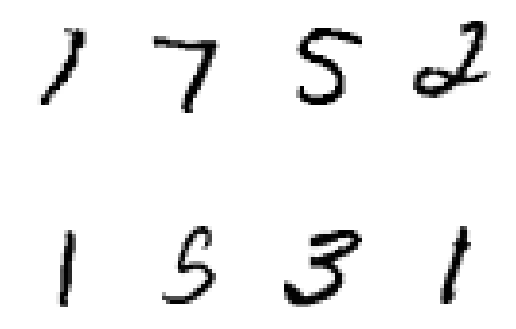

[1 7 5 2 1 5 3 1]


In [ ]:
# 1D
for i in range(8):
    plt.subplot(2,4,i+1)
    digit = X_sample[i,:].reshape(28,28)
    plt.imshow(digit, cmap='Greys')
    plt.axis('off')
plt.show()

print(y_sample[:8])

Scale the pixel values to a range between 0 and 1 to improve the performance of some algorithms.

In [ ]:
# 1E
X_scaled = X_sample/255


# Model Selection

In this section, various machine learning models are evaluated and compared to select the best-performing model for MNIST digit classification. The models considered include Logistic Regression, K-Nearest Neighbors, Decision Tree, and Random Forest.

5-fold cross-validation is used throughout this section for model evaluation.

### Logistic Regression

Evaluate the performance of a Logistic Regression model using 5-fold cross-validation.

In [ ]:
%%time
# 2A

lr_model = LogisticRegression(penalty=None, solver='saga', tol=0.01, max_iter=1000)
cv = cross_val_score(lr_model, X_scaled, y_sample, cv=5, scoring = 'accuracy', n_jobs=-1)

print('CV_score:', cv.round(4), cv.mean().round(4) )



CV_score: [0.9005 0.9045 0.913  0.906  0.9065] 0.9061
CPU times: total: 15.6 ms
Wall time: 13.3 s


### K-Nearest Neighbors

Perform hyperparameter tuning for a K-Nearest Neighbors model using GridSearchCV.


In [ ]:
%%time
# 2B
# Hyperparameter tuning for KNN
KNN = KNeighborsClassifier()
neighbors_dict = {'n_neighbors':[2,4,6,8,10,12,14,16]}

knn_grid = GridSearchCV(KNN, neighbors_dict, cv=5, refit='True')
knn_grid.fit(X_scaled, y_sample)
knn_mod = knn_grid.best_estimator_

print('Best Parameters:',knn_grid.best_params_)
print('Best CV Score:', knn_grid.best_score_)
print('Training Acc:', knn_grid.score(X_scaled, y_sample))



C:\Users\sahdu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\sahdu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\sahdu\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sahdu\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\sahdu\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Best Parameters: {'n_neighbors': 4}
Best CV Score: 0.9445
Training Acc: 0.9689
CPU times: total: 2min 8s
Wall time: 7.78 s


Visualize the results of the KNN hyperparameter tuning.

Visualize KNN grid search results

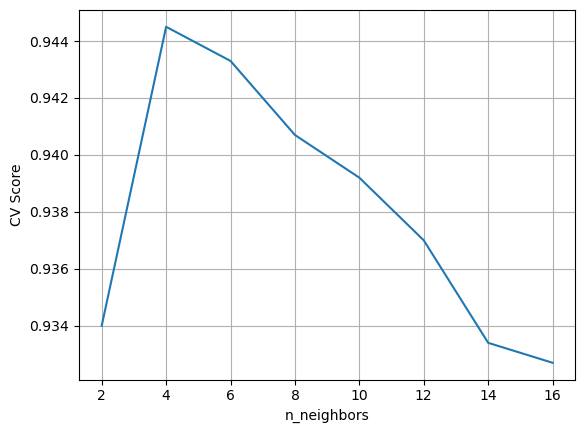

In [ ]:
knn_summary = pd.DataFrame(knn_grid.cv_results_['params'])
knn_summary['cv_score'] = knn_grid.cv_results_['mean_test_score']

plt.plot(knn_summary.n_neighbors, knn_summary.cv_score)
plt.xlabel('n_neighbors')
plt.ylabel('CV Score')
plt.xticks(knn_summary.n_neighbors)
plt.grid()
plt.show()

### Decision Trees

Perform hyperparameter tuning for a Decision Tree model using GridSearchCV.

In [ ]:
%%time
# Hyperparameter tuning for KNN
dt_clf = DecisionTreeClassifier(random_state=1)
dt_parameters = {'max_depth':[8,10,12,14,16,18,20,22,24,26],
           'min_samples_leaf':[2,4,6,8,10]}

dt_grid = GridSearchCV(dt_clf, dt_parameters, cv=5, refit='True', n_jobs=-1)
dt_grid.fit(X_scaled, y_sample)
dt_mod = dt_grid.best_estimator_

print('Best Parameters:', dt_grid.best_params_)
print('Best CV Score:', round(dt_grid.best_score_,4))
print('Training Acc:', dt_grid.score(X_scaled, y_sample))


Best Parameters: {'max_depth': 16, 'min_samples_leaf': 4}
Best CV Score: 0.8043
Training Acc: 0.9301
CPU times: total: 1.81 s
Wall time: 35.3 s


Visualize the results of the Decision Tree hyperparameter tuning.

Visualize Decision Tree grid search results

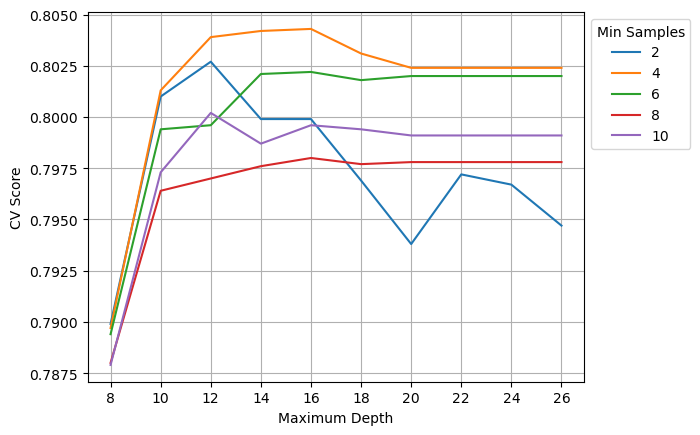

In [ ]:
dt_summary = pd.DataFrame(dt_grid.cv_results_['params'])
dt_summary['cv_score'] = dt_grid.cv_results_['mean_test_score']

for ms in dt_parameters['min_samples_leaf']:
    temp = dt_summary.query(f'min_samples_leaf == {ms}')
    plt.plot(temp.max_depth, temp.cv_score, label=ms)
plt.xlabel('Maximum Depth')
plt.ylabel('CV Score')
plt.legend(title='Min Samples', bbox_to_anchor=[1,1])
plt.xticks(dt_parameters['max_depth'])
plt.grid()
plt.show()

### Random Forests

Perform hyperparameter tuning for a Random Forest model using GridSearchCV.

In [ ]:
%%time
#Hyperparameter tuning for Random Forest
rf_clf = RandomForestClassifier(random_state=1)
rf_parameters = {'max_depth':[4,6,8,10,12,14,16,18,20,22,24,26],
           'min_samples_leaf':[2,4,6,8,10]}

rf_grid = GridSearchCV(rf_clf, rf_parameters, cv=5, refit='True', n_jobs=-1)
rf_grid.fit(X_scaled, y_sample)
rf_mod = rf_grid.best_estimator_

print('Best Parameters:', rf_grid.best_params_)
print('Best CV Score:', round(rf_grid.best_score_,4))
print('Training Acc:', rf_grid.score(X_scaled, y_sample))



Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2}
Best CV Score: 0.9462
Training Acc: 0.999
CPU times: total: 5.5 s
Wall time: 1min 56s


Visualize the results of the Random Forest hyperparameter tuning.

Visualize Random Forest grid search results

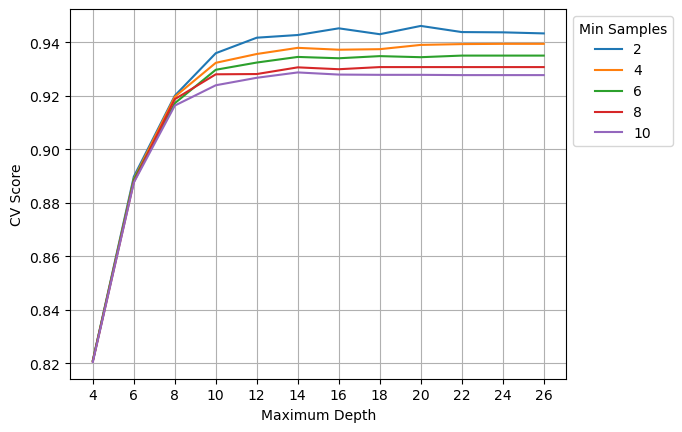

In [ ]:
rf_summary = pd.DataFrame(rf_grid.cv_results_['params'])
rf_summary['cv_score'] = rf_grid.cv_results_['mean_test_score']

for ms in rf_parameters['min_samples_leaf']:
    temp = rf_summary.query(f'min_samples_leaf == {ms}')
    plt.plot(temp.max_depth, temp.cv_score, label=ms)
plt.xlabel('Maximum Depth')
plt.ylabel('CV Score')
plt.legend(title='Min Samples', bbox_to_anchor=[1,1])
plt.xticks(rf_parameters['max_depth'])
plt.grid()
plt.show()

## Final Model

Based on the cross-validation scores from the previous section, the Random Forest model exhibited the highest performance. This section focuses on training and evaluating the final Random Forest model using the entire dataset for improved accuracy.

Prepare the full dataset for model training by creating feature and label arrays and scaling the pixel values.

In [ ]:
# 3A

X_train = dr_train.drop(['label'], axis = 1).values
X_train_scaled = X_train/255
y_train = dr_train.label.values

print(X_train.shape, y_train.shape)

(42000, 784) (42000,)


Train the final Random Forest model using the best hyperparameter values identified during tuning. Evaluate the model's performance using 10-fold cross-validation.

In [ ]:
%%time
# 3B
rf_clf = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, random_state=1)
rf_clf.fit(X_train_scaled, y_train)
cv = cross_val_score(rf_clf, X_train_scaled, y_train, cv=10, scoring = 'accuracy', n_jobs = -1)
print('CV Score:', cv.mean().round(4))


CV Score: 0.9627
CPU times: total: 14.2 s
Wall time: 59.8 s


Generate out-of-sample predictions using 10-fold cross-validation, display a confusion matrix, and create a classification report to assess the model's performance on unseen data.

In [ ]:
%%time
# 3C
predictions = cross_val_predict(rf_clf, X_train_scaled, y_train, cv=10, n_jobs = -1)
cm = confusion_matrix(y_train, predictions)
pd.DataFrame(cm)



CPU times: total: 62.5 ms
Wall time: 34.4 s


,0,1,2,3,4,5,6,7,8,9
0,4070,0,3,1,5,6,19,1,25,2
1,0,4610,21,17,8,5,5,9,7,2
2,18,9,4015,22,20,2,17,38,30,6
3,5,4,62,4114,2,51,7,33,50,23
4,5,6,6,0,3937,1,25,7,11,74
5,16,10,3,54,5,3621,33,4,26,23
6,18,5,3,0,9,25,4059,0,17,1
7,5,18,51,5,24,2,0,4224,11,61
8,7,24,19,45,19,32,13,4,3846,54
9,22,12,11,60,63,14,3,39,26,3938


**Analysis of Misclassifications**

The most common misclassification mode by the model was to classify the digit 4 as the digit 9. The second most common misclassification mode was to classify the digit 9 as the digit 4.

Generate a detailed classification report to evaluate the model's performance for each digit class.

In [ ]:
# 3E
cr = classification_report(y_train, predictions, output_dict = True)
df = pd.DataFrame(cr).T
df

,precision,recall,f1-score,support
0,0.976956,0.984995,0.980959,4132.000000
1,0.981269,0.984202,0.982733,4684.000000
2,0.957320,0.961216,0.959264,4177.000000
3,0.952756,0.945530,0.949129,4351.000000
4,0.962121,0.966847,0.964478,4072.000000
5,0.963288,0.954150,0.958697,3795.000000
6,0.970820,0.981146,0.975956,4137.000000
7,0.969030,0.959782,0.964384,4401.000000
8,0.949864,0.946591,0.948225,4063.000000
9,0.941205,0.940306,0.940755,4188.000000


## Predictions on New Observations

This section utilizes the trained Random Forest model to generate predictions for new, unlabeled images from the 'digit-recognizer/test.csv' file.

Load the new observations, sample a subset for prediction, and scale the pixel values.

In [ ]:
# 4A
df_new = pd.read_csv('test.csv')
df_new = df_new.sample(n=16, random_state=4)
X_new = df_new.values / 255
print(X_new.shape)

(16, 784)


Visualize the sampled new observations.

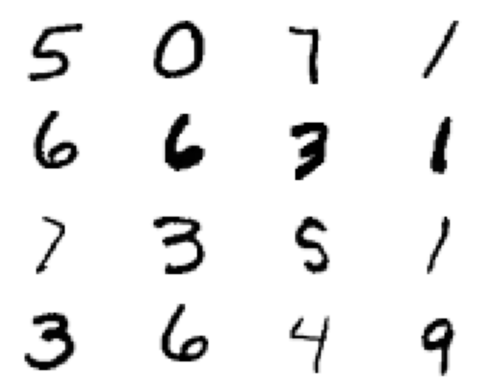

In [ ]:
# 4B
for i in range(16):
    plt.subplot(4,4,i+1)
    digit = X_new[i,:].reshape(28,28)
    plt.imshow(digit, cmap='Greys')
    plt.axis('off')
plt.show()

Generate and display predictions for the new observations.

In [ ]:
# 4C
preds = rf_clf.predict(X_new).reshape(4,4)
preds
# preds_array = preds.reshape(4,4)
# preds_array

array([[5, 0, 7, 1],
       [6, 6, 7, 1],
       [7, 3, 5, 1],
       [3, 6, 4, 9]], dtype=int64)

**Analysis of Predictions on New Observations**

For our chose sample, the model was least confident on the digit 3 and generated an incorrect prediction for this observation as seen in index six[0-15].This may be due to the subtleness of the bottom half of the digit "3", as it was pictured above. The model likely interpreted this as a vertical line. We see below that prediction in index six, the interpretation for the handwritten digit 3, had a roughly 25% chance of being 3, an 8, a 7, vs everything else. Since the model predicted a .29 (29%) confidence for the digit as a 7, that became it's final prediction of the handwritten 3.

Despite this, we see the model predicted every other number perfectly. On this observed sample, we have a 94% accuracy.

In [ ]:
# 4E
preds = rf_clf.predict_proba(X_new)
rounded_preds = preds.round(2)
rounded_preds

array([[0.  , 0.  , 0.  , 0.02, 0.02, 0.88, 0.01, 0.  , 0.02, 0.03],
       [0.99, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.09, 0.05, 0.08, 0.  , 0.01, 0.  , 0.74, 0.01, 0.02],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.06, 0.23, 0.02, 0.02, 0.01, 0.29, 0.23, 0.13],
       [0.  , 0.94, 0.  , 0.02, 0.  , 0.01, 0.  , 0.  , 0.03, 0.  ],
       [0.  , 0.17, 0.33, 0.07, 0.01, 0.  , 0.  , 0.36, 0.03, 0.02],
       [0.  , 0.  , 0.01, 0.91, 0.  , 0.05, 0.  , 0.  , 0.03, 0.  ],
       [0.01, 0.01, 0.02, 0.08, 0.06, 0.55, 0.04, 0.01, 0.11, 0.11],
       [0.  , 0.97, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.95, 0.  , 0.02, 0.  , 0.  , 0.01, 0.02],
       [0.01, 0.01, 0.  , 0.01, 0.02, 0.01, 0.94, 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.  , 0.

Determine the model's confidence in its predictions by identifying the largest probability value for each observation.

In [ ]:
# 4F

probs= np.max(rounded_preds, axis=1)
maxprobs = np.vstack(probs)
print('largest value stacked','\n',maxprobs)
sort = np.sort(maxprobs, axis=None)
print('sorted',sort)

largest value stacked 
 [[0.88]
 [0.99]
 [0.74]
 [0.99]
 [1.  ]
 [0.99]
 [0.29]
 [0.94]
 [0.36]
 [0.91]
 [0.55]
 [0.97]
 [0.95]
 [0.94]
 [0.7 ]
 [0.95]]
sorted [0.29 0.36 0.55 0.7  0.74 0.88 0.91 0.94 0.94 0.95 0.95 0.97 0.99 0.99
 0.99 1.  ]


In [ ]:
#4F (additional)
np.argmax(rounded_preds, axis=1).reshape(4,4)

array([[5, 0, 7, 1],
       [6, 6, 7, 1],
       [7, 3, 5, 1],
       [3, 6, 4, 9]], dtype=int64)

The model exhibited the least confidence in its predictions for observations in index position[0-15]: six, eight, and ten, in increasing order of confidence. This suggests that these observations may be more challenging to classify accurately.